In [1]:
import sys
sys.path.insert(0, '..')

import pandas as pd
import numpy as np
import dataframe_manip as hp
from fbprophet import Prophet

%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
data = hp.csv_to_dataframe('../wifi_data_until_20190204.csv')

In [3]:
building_data = hp.get_daily_average(data, 'CLARK')

In [4]:
m = Prophet(yearly_seasonality=True)
m.fit(building_data)

/opt/conda/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/conda/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [5]:
# Python
future = m.make_future_dataframe(periods=180)
future.tail()

,ds
377,2019-07-30
378,2019-07-31
379,2019-08-01
380,2019-08-02
381,2019-08-03


In [6]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
377,2019-07-30,89.007199,70.074311,109.742416
378,2019-07-31,90.039703,70.492761,110.427525
379,2019-08-01,83.073925,63.260766,103.277833
380,2019-08-02,77.914965,58.691293,97.971541
381,2019-08-03,70.612787,50.014886,89.654010


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


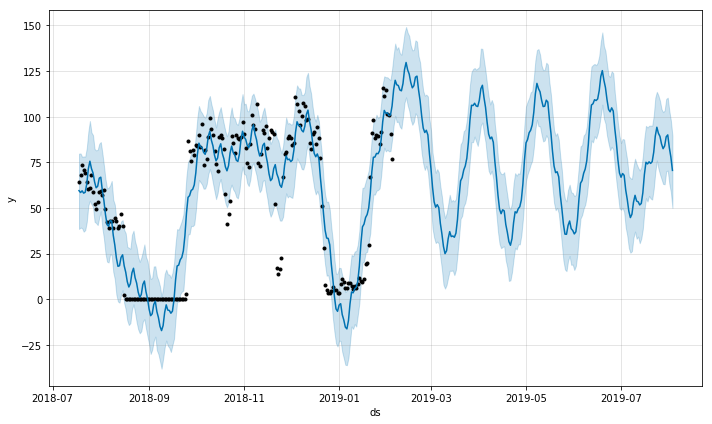

In [7]:
# Python
fig1 = m.plot(forecast)

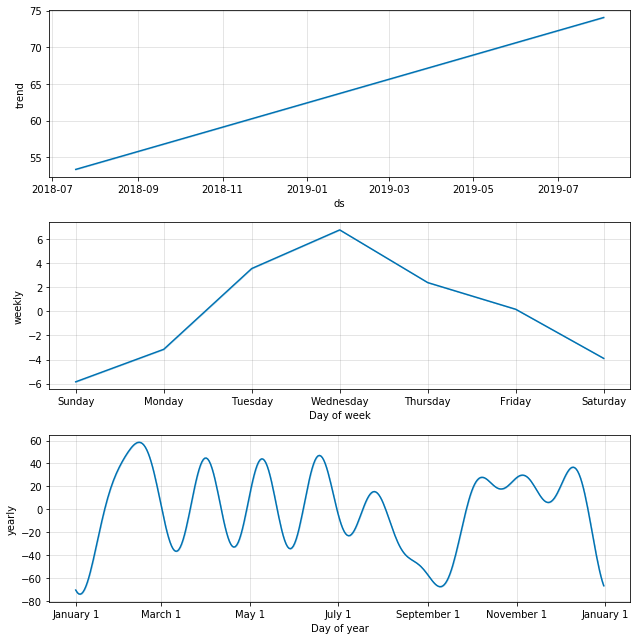

In [8]:
# Python
fig2 = m.plot_components(forecast)